# Global Superstore Data Analysis

## Objective:

- Find out which areas/categories are doing well in terms of sales-profit and which are not.


- Try to find out weak areas/categories where you can work to increase sales and make more profit.


- Find out which are the factors affecting stores sales-profit and any particular categories which need focus to improve profit.

In [1]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
## Importing the global superstore dataset
df=pd.read_excel(r"C:\Users\Shree\Desktop\POWER BI\PROJECTS\global_superstore_2016.xlsx")

In [3]:
## Show first 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
## Display all the columns of the dataframe
pd.set_option('display.max_columns',None)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
## Gives total no of columns and rows.
df.shape
print(f"rows = {df.shape[0]}\ncolumns = {df.shape[1]}")

rows = 51290
columns = 24


In [6]:
## Generate descriptive statistics.
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [7]:
df["Row ID"].nunique()

51290

In [8]:
df["Postal Code"].nunique()

631

In [9]:
## Drop RowID column as its having all unique data
df.drop(columns="Row ID",axis=1,inplace=True)

In [10]:
## Generate descriptive statistics for categorical data.
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290
unique,25728,4,17415,796,3,3650,1102,165,23,5,3788,3,17,3788,4
top,CA-2015-SV20365140-42268,Standard Class,SV-203651406,Muhammed Yedwab,Consumer,New York City,California,United States,Western Europe,Asia Pacific,OFF-FA-6129,Office Supplies,Binders,Staples,Medium
freq,14,30775,26,108,26518,915,2001,9994,5883,14302,227,31289,6146,227,29433


In [11]:
## Get total no of unique values of each column.
df.nunique()

Order ID          25728
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID       17415
Customer Name       796
Segment               3
Postal Code         631
City               3650
State              1102
Country             165
Region               23
Market                5
Product ID         3788
Category              3
Sub-Category         17
Product Name       3788
Sales             27200
Quantity             14
Discount             29
Profit            28234
Shipping Cost     16753
Order Priority        4
dtype: int64

In [12]:
## Find the missing/null values from each column of the dataframe.
df.isnull().sum()

Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

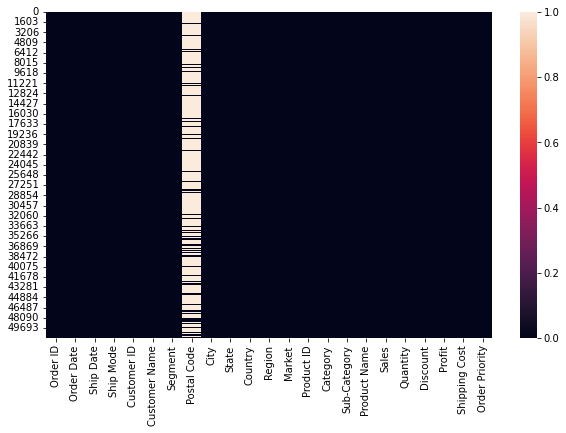

In [13]:
## Show all columns & missing values in them in a heatmap form.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [14]:
## Show the correlation between numericals features.
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025491
Sales,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.767835
Quantity,0.012761,0.313577,1.000000,-0.019875,0.104365,0.271804
Discount,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.078153
Profit,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354423
Shipping Cost,-0.025491,0.767835,0.271804,-0.078153,0.354423,1.000000


<AxesSubplot:>

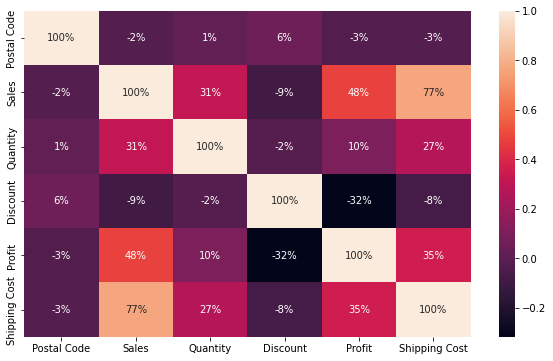

In [15]:
## Show correlation in heatmap form.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [16]:
## Drop Postal code column as it contains max null values which has no use for analysis.
df.drop(columns="Postal Code",inplace= True)

In [17]:
## Create new year column by extracting year from order date column.
df["Year"]=df["Order Date"].dt.year

In [18]:
## Create new Profit Margin column in a dataframe.
df["Profit Margin%"]=round((df["Profit"]/df["Sales"])*100,2)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Year,Profit Margin%
0,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High,2014,28.00
1,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2014,-7.78
2,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2014,17.78
3,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2014,-3.34
4,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2014,11.00


In [19]:
num_data=df[["Sub-Category","Sales","Quantity","Discount","Profit","Shipping Cost"]]

## Feature Distribution 

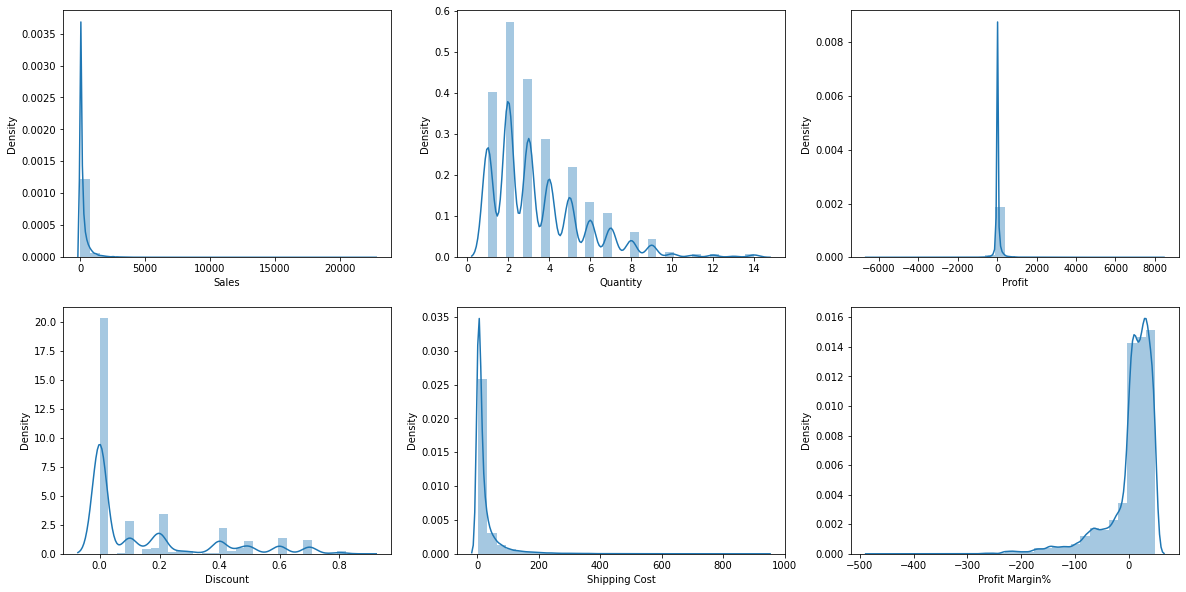

In [20]:
## Plot histograms to understand distribution of each feature.
num_feature=["Sales","Quantity","Profit","Discount","Shipping Cost","Profit Margin%"]

plt.figure(figsize=(20,10))
i=1
for feature in num_feature:
    plt.subplot(2,3,i)
    sns.distplot(df[feature],bins=30,kde=True)
    plt.xlabel(feature)
    i=i+1

- From above histograms,We can see that features like sales,profit,shipping cost are grouped in narrow region while quantity follows right skewed distribution as very less ordered placed in which quantity is very high.


- Lots of products having negative profit margin as it follows left skewed distribution also in majority of cases no discount given on product. 

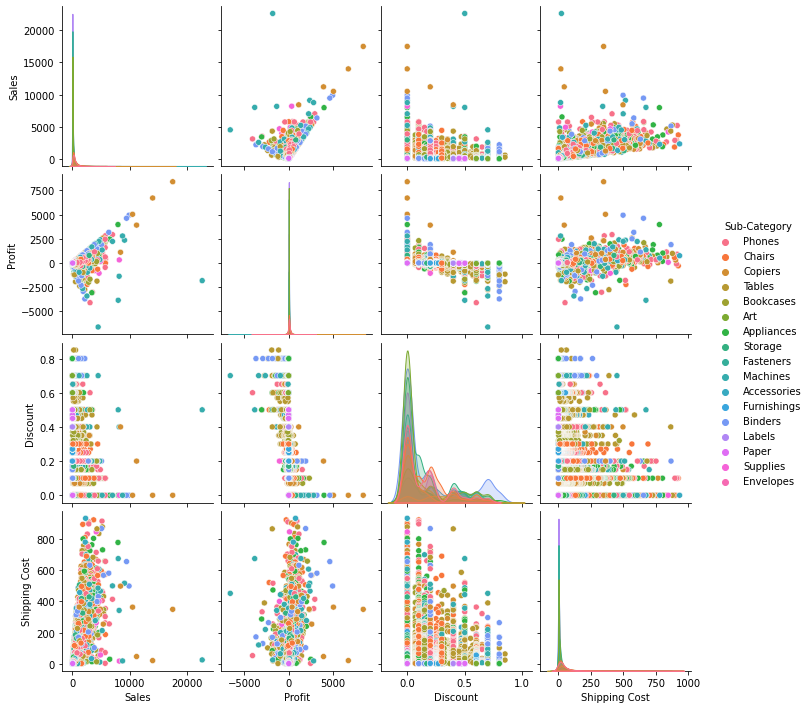

In [21]:
sns.pairplot(vars=["Sales","Profit","Discount","Shipping Cost"],hue="Sub-Category",data=df)

- From above plot,we can see that sales column is positively skewed from scatterplot as sales increase more profit gain by subcategories but we can also see that in some subcategory as sales are increasing profit is going negative which does not make sense.


- This can be due to discounts as because of very high discounts losses are incurred which result in low profit margin.

## Market-Region Analysis

In [22]:
market=df.groupby("Market")["Sales","Profit","Quantity","Shipping Cost"].sum()
market.sort_values(by=["Profit"],ascending=False)

,Sales,Profit,Quantity,Shipping Cost
Market,,,,
Europe,3.287336e+06,449551.72350,41919,348905.0340
Asia Pacific,4.042658e+06,403176.03800,48597,437858.1640
USCA,2.364129e+06,304214.41170,38706,247457.4204
LATAM,2.164605e+06,221643.48708,38526,235025.6150
Africa,7.837732e+05,88871.63100,10564,88839.4700


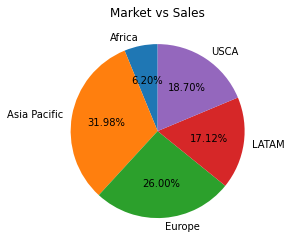

In [23]:
plt.pie(market["Sales"],labels=market.index,startangle=90,autopct='%1.2f%%')
plt.title("Market vs Sales")
plt.show()

- Majority of sales are from Asia Pacific followed by Europe,USCA,LATAM and least for Africa.


- We can anlyze further reason behind lowest sales in africa like which states,cities not perfom good is there an specific segment or subcategory that need to focus.

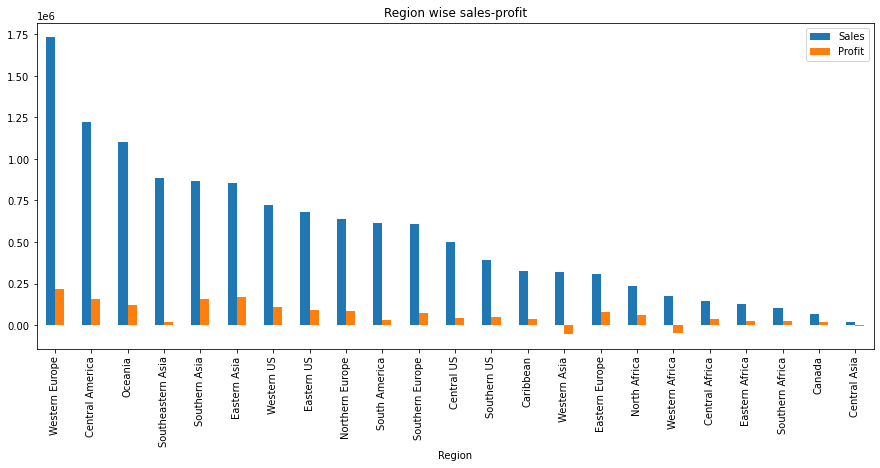

In [24]:
## Region wise sales-profit analysis
region=df.groupby("Region")["Sales","Profit","Quantity"].sum()
region[["Sales","Profit"]].sort_values(by=["Sales"],ascending=False).plot.bar(figsize=(15,6))
plt.xticks(rotation=90)
plt.title("Region wise sales-profit")
plt.show()

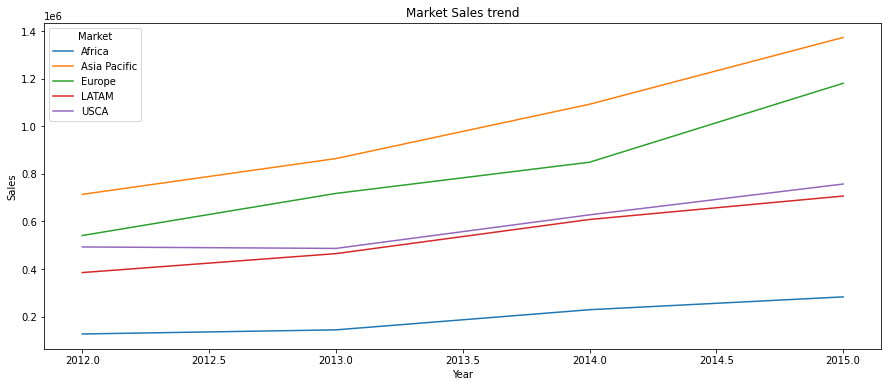

In [25]:
## Market sales trend for each year
df.pivot_table(index="Year",columns="Market",values="Sales",aggfunc="sum").plot(kind="line",figsize=(15,6))
plt.title("Market Sales trend")
plt.ylabel("Sales")
plt.show()


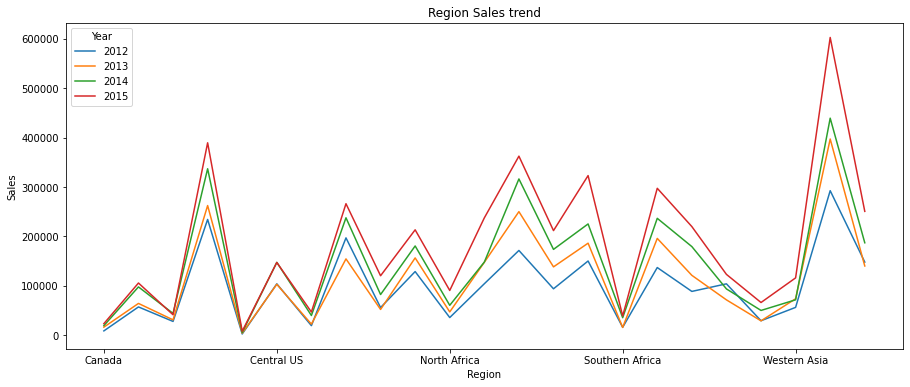

In [26]:
## Region sales trend for each year
df.pivot_table(index="Region",columns="Year",values="Sales",aggfunc="sum").plot(kind="line",figsize=(15,6))
plt.title("Region Sales trend")
plt.ylabel("Sales")
plt.show()

- There is continuous increase in sales from 2012-2015 for each global market except USCA as its sales decrease from 2012 and then again increase upto 2015. 


- Sales growth for Africa market is very stagnent compared to others. 

## Countrywise Analysis

In [27]:
## Creating dataframes for each market-region
asia=df[df["Market"]=="Asia Pacific"]
africa=df[df["Market"]=="Africa"]
europe=df[df["Market"]=="Europe"]
usca=df[df["Market"]=="USCA"]

In [28]:
con_pm=asia.pivot_table(index="Country",columns="Year",values="Profit Margin%",aggfunc="mean",dropna=True)
con_pm.shape

(47, 4)

In [29]:
country=df.groupby("Country")['Sales','Profit'].sum().sort_values(by=["Sales"],ascending=False)
country

,Sales,Profit
Country,,
United States,2.297201e+06,286397.0217
Australia,9.252359e+05,103907.4330
France,8.589311e+05,109029.0030
China,7.005620e+05,150683.0850
Germany,6.281362e+05,107190.3255
...,...,...
Equatorial Guinea,1.505100e+02,44.4600
Oman,7.665000e+01,37.0200
Belize,7.512000e+01,30.3400


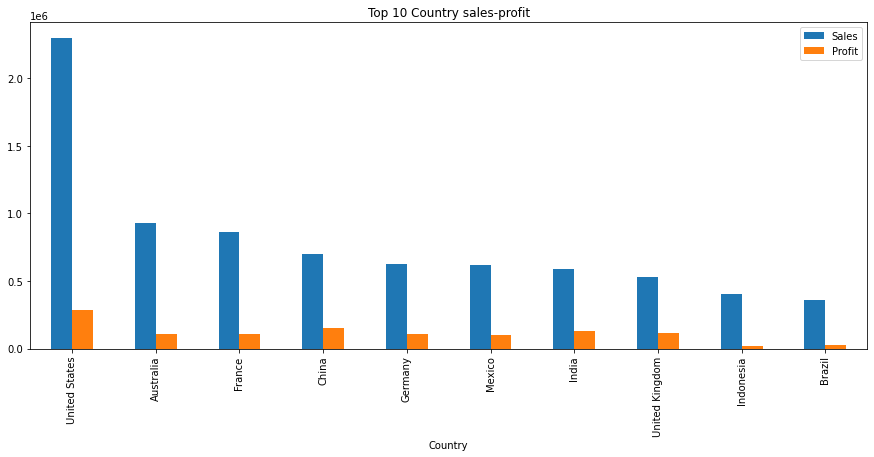

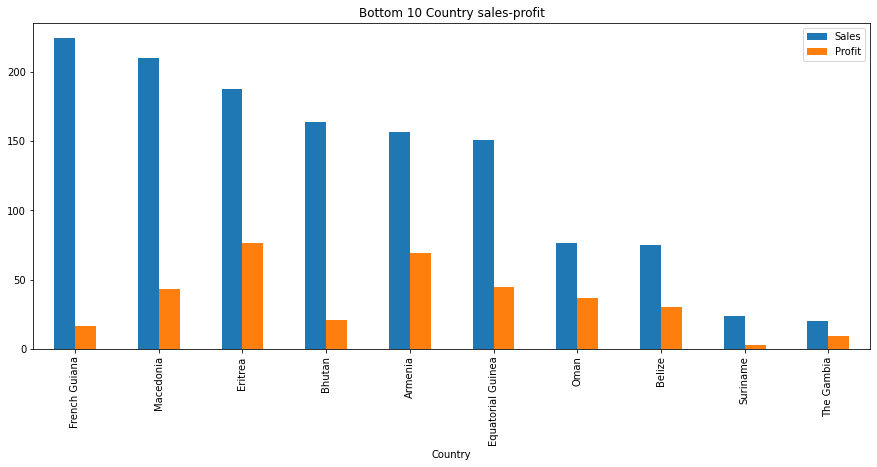

In [30]:
## Plot barchart showing sales-profit of each country.

country[:10].plot(kind="bar",figsize=(15,6))
plt.title("Top 10 Country sales-profit")
plt.show()

country.tail(10).plot(kind="bar",figsize=(15,6))
plt.title("Bottom 10 Country sales-profit")
plt.show()

- United states having highest sales and profit among all countries ,majority top contries are from asia pacific region.
  while countries from africa region Gambia having lowest sales and profit.


- We can analyze further state and citywise performance of each country to get more detail insights.

## Statewise Analysis

In [31]:
state=df.groupby("State")['Sales','Profit',"Quantity","Shipping Cost"].sum().sort_values(by=["Profit"],ascending=False)
state

,Sales,Profit,Quantity,Shipping Cost
State,,,,
England,485170.9710,99907.7310,5656,49198.96400
California,457687.6315,76381.3871,7667,48901.58336
New York,310876.2710,74038.5486,4224,32135.94000
Ile-de-France,317822.5440,44055.9240,3839,35562.04000
New South Wales,270487.1040,43695.9840,2921,28162.14000
...,...,...,...,...
Izmir,15161.9160,-15729.8040,307,1714.67000
Ohio,78258.1360,-16971.3766,1759,9973.51000
Texas,170188.0458,-25729.3563,3724,17604.40000


In [32]:
## Yearwise sales-profit perfomrnace of each state
df.pivot_table(index="State",columns="Year",values=["Sales","Profit"],aggfunc="sum")

Profit                                    Sales            \
Year         2012      2013      2014       2015      2012      2013   
State                                                                  
'Ajman   -246.078       NaN       NaN  -86.63400   161.082       NaN   
'Amman    138.300   347.370   364.500  947.82000   470.400  1296.360   
'Asir     139.290    64.890   106.470        NaN   446.550   731.040   
Abia      -90.174  -589.353  -219.804 -576.22500   134.946   292.347   
Abruzzi    24.540   483.780    13.230  456.21000   256.560  1727.220   
...           ...       ...       ...        ...       ...       ...   
Zinder        NaN       NaN    71.760   50.52000       NaN       NaN   
Zulia    -651.900   -33.984  -229.820  -78.43904  2087.160    87.096   
Zürich     45.120  1091.670  1653.780  602.91000   399.930  3476.910   
Šiauliai      NaN       NaN       NaN -164.73900       NaN       NaN   
Žilina        NaN    18.840       NaN        NaN       NaN    60.120   

                                
Year          2014        2015  
State                           
'Ajman         NaN    48.90600  
'Amman    1586.730  3814.50000  
'Asir      425.910         NaN  
Abia       124.416   512.41500  
Abruzzi     57.600  4682.37000  
...            ...         ...  
Zinder     231.840   130.89000  
Zulia     1047.420   987.26096  
Zürich    4933.980  2896.92000  
Šiauliai       NaN    96.56100  
Žilina         NaN         NaN  

[1102 rows x 8 columns]

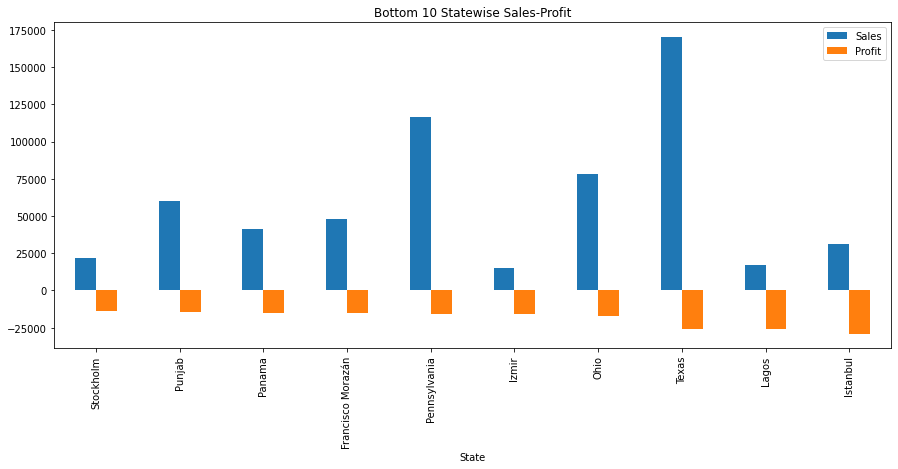

In [33]:
## Plot barchart showing sales-profit of bottom 10 states.
state[["Sales","Profit"]].tail(10).plot(kind="bar",figsize=(15,6))
plt.title("Bottom 10 Statewise Sales-Profit")
plt.show()

## Citywise Analysis

In [34]:
city=df.groupby("City")["Sales","Profit","Quantity","Shipping Cost"].sum().sort_values(by=["Sales"],ascending=False)
city

,Sales,Profit,Quantity,Shipping Cost
City,,,,
New York City,256368.1610,62036.9837,3417,27095.17000
Los Angeles,175851.3410,30440.7579,2879,18887.07336
Manila,120886.9485,-11158.5615,1661,11537.06000
Seattle,119540.7420,29156.0967,1590,11641.45054
San Francisco,112669.0920,17507.3854,1935,10830.24000
...,...,...,...,...
Felahiye,2.8080,-0.7020,1,1.14000
Pensacola,2.2140,-1.4760,3,1.98000
Jupiter,2.0640,0.1548,1,1.23000


In [35]:
## Yearwise sales-profit perfomrnace of each state
df.pivot_table(index="City",columns="Year",values=["Sales","Profit"],aggfunc="sum")

Profit                               Sales            \
Year                     2012     2013     2014     2015     2012      2013   
City                                                                          
Aachen                 12.240  762.789  341.952      NaN   41.040  2587.419   
Aalen                     NaN      NaN  283.005      NaN      NaN       NaN   
Aalst                     NaN      NaN  152.310      NaN      NaN       NaN   
Aba                   -90.174 -589.353 -219.804 -576.225  134.946   292.347   
Abadan                 11.700      NaN  163.500   58.620   97.680       NaN   
...                       ...      ...      ...      ...      ...       ...   
Zwedru                 11.850      NaN      NaN      NaN   49.410       NaN   
Zwickau                 8.280      NaN      NaN   11.100   21.420       NaN   
Zwolle                -52.380      NaN      NaN   -2.715  144.990       NaN   
eMbalenhle             13.620      NaN      NaN      NaN   75.900       NaN   
Águas Lindas de Goiás     NaN      NaN    3.920   37.120      NaN       NaN   

                                          
Year                       2014     2015  
City                                      
Aachen                 1174.692      NaN  
Aalen                   979.695      NaN  
Aalst                   387.330      NaN  
Aba                     124.416  512.415  
Abadan                  880.380  376.890  
...                         ...      ...  
Zwedru                      NaN      NaN  
Zwickau                     NaN   77.610  
Zwolle                      NaN    5.595  
eMbalenhle                  NaN      NaN  
Águas Lindas de Goiás    14.600  172.360  

[3650 rows x 8 columns]

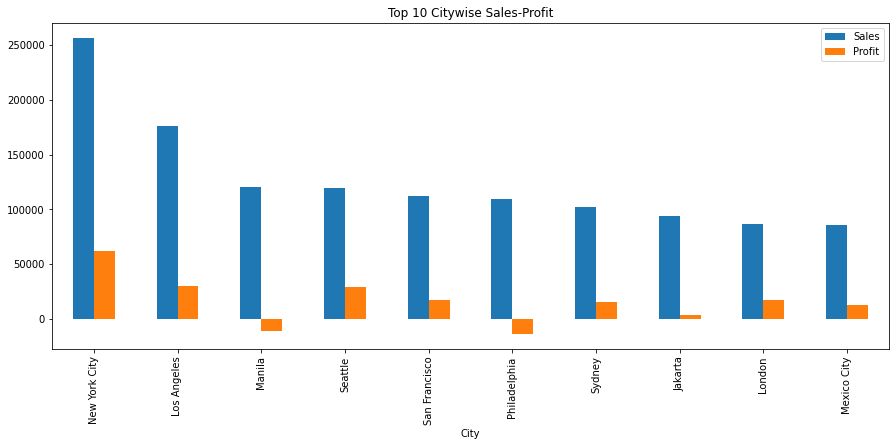

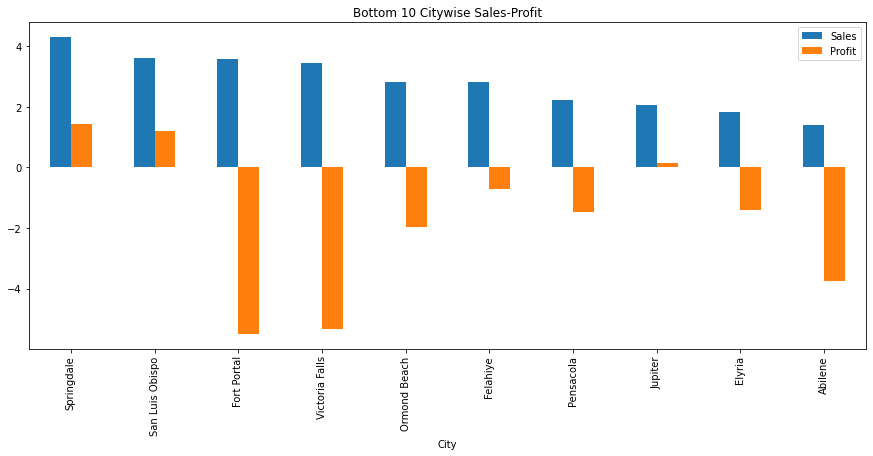

In [36]:
## Plot barchart showing sales-profit of top 10 states.
city[["Sales","Profit"]][:10].plot(kind="bar",figsize=(15,6))
plt.title("Top 10 Citywise Sales-Profit")
plt.show()

## Plot barchart showing sales-profit of bottom 10 states.
city[["Sales","Profit"]].tail(10).plot(kind="bar",figsize=(15,6))
plt.title("Bottom 10 Citywise Sales-Profit")
plt.show()

- New york is having highest sales-profit followed by los-angeles, there some cities which having high sales but profit is   negative one of reason may be this stores giving very high discounts resulting in lowest profit margin.


- Cities like Fort Portal,Victoria Falls,Abiline having lowest profit among all cities, to know root cause we have to analyze their category and subcategory wise performance. 

## Segment Analysis

In [37]:
## Show all the unique values of segment column with their count.
df["Segment"].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [38]:
## Create groups based on segment and show statistics summary for other columns.
segment=df.groupby("Segment")["Sales","Quantity","Profit","Shipping Cost"].sum()

In [39]:
## Sort the segment dataframe by the sales values in descending order.
segment.sort_values(by=["Sales"], ascending=False)

,Sales,Quantity,Profit,Shipping Cost
Segment,,,,
Consumer,6.507949e+06,92157,749239.78206,700005.1199
Corporate,3.824698e+06,53565,441208.32866,412031.9120
Home Office,2.309855e+06,32590,277009.18056,246048.6715


Text(0.5, 1.0, 'Segment vs Category')

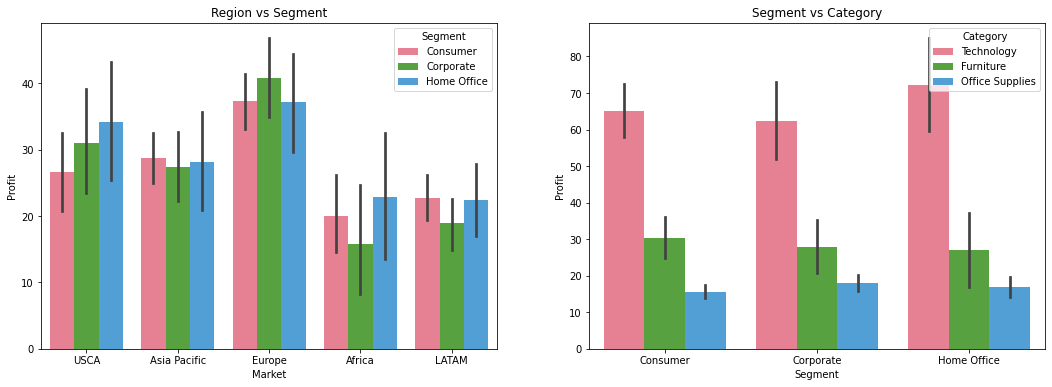

In [40]:
## Analyze segment and category in detail.
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(x="Market",y="Profit",hue="Segment",data=df,palette='husl')
plt.title("Region vs Segment")

plt.subplot(1,2,2)
sns.barplot(x="Segment",y="Profit",hue="Category",data=df,palette="husl")
plt.title("Segment vs Category")


- From above plots,we conclude that homeoffice segment performs well in most region but consumer and corporate segment needs focus as these two having low profit. 


- Technology category perfoms well(highest profit) in each segment followed by furniture but office supplies need focus as its having lowest profit in each segment.


- So we have to analyze Consumer-Corporate segment in detail and within that try to find reason behind low profit for office-supplies category.

## Shipmode Analysis

In [41]:
shipmode=df.groupby("Ship Mode")["Quantity"].sum()
shipmode

Ship Mode
First Class        26039
Same Day            9230
Second Class       35724
Standard Class    107319
Name: Quantity, dtype: int64

In [42]:
df["Ship Mode"].unique()

array(['First Class', 'Second Class', 'Same Day', 'Standard Class'],
      dtype=object)

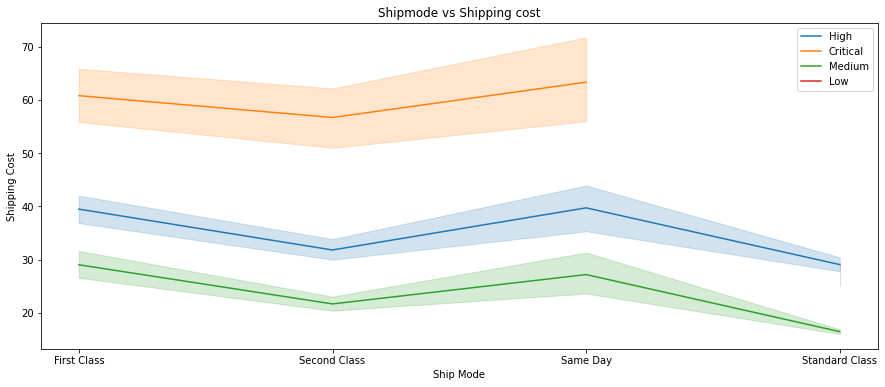

In [43]:
## Effect of order priority on shipping cost for each shipmode
plt.figure(figsize=(15,6))
sns.lineplot(x="Ship Mode",y="Shipping Cost",data=df,hue="Order Priority")
plt.legend()
plt.title("Shipmode vs Shipping cost")
plt.show()

Text(0.5, 1.0, 'Shipmode vs Order Quantity')

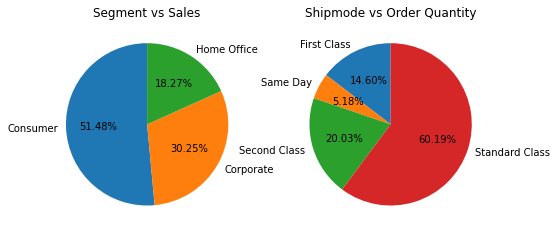

In [44]:
## Plot pie chart showing segment wise sales analysis.
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(segment["Sales"],labels=["Consumer","Corporate","Home Office"],startangle=90,autopct='%1.2f%%')
plt.title("Segment vs Sales")


## Plot pie chart showing shipmode wise shipping cost. 
plt.subplot(1,2,2)
plt.pie(shipmode.values,labels=shipmode.index,startangle=90,autopct='%1.2f%%')
plt.title("Shipmode vs Order Quantity")

- Almost 52% of total sales coming from consumer segment followed by corporate then home office.
  We have to anaylze how each segment performs in different subcategories so that to know reason behind this sales pattern.


- Most of orders around 60% are from standard class and least for same day means majority of consumers prefer delivery by standard class shipmode.

## Category & Sub-Category Analysis

In [45]:
## Show all the unique values of category column with their count.
df["Category"].value_counts()

Office Supplies    31289
Technology         10141
Furniture           9860
Name: Category, dtype: int64

In [46]:
## Create groups based on category and show statistics summary for sales and profit columns.
cat=df.groupby("Category")["Sales","Profit"].sum()
cat

,Sales,Profit
Category,,
Furniture,4.110452e+06,285082.73020
Office Supplies,3.787493e+06,518595.82790
Technology,4.744557e+06,663778.73318


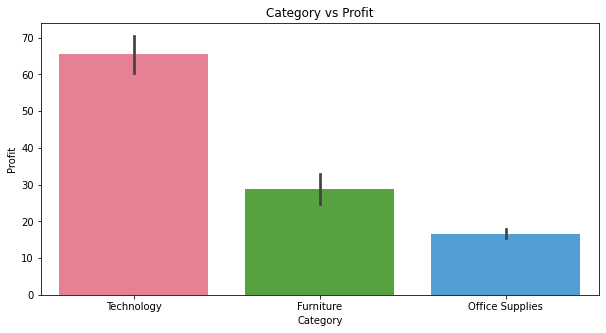

In [47]:
## Profit analysis of category 
plt.figure(figsize=(10,5))
sns.barplot(x="Category",y="Profit",data=df,palette="husl")
plt.title("Category vs Profit")
plt.show()

In [48]:
op_quantity=df.groupby("Order Priority")["Shipping Cost"].sum()
op_quantity

Order Priority
Critical    234926.93536
High        510508.86700
Low          65785.08500
Medium      546864.81604
Name: Shipping Cost, dtype: float64

Text(0.5, 1.0, 'Order Priority vs Shipping cost')

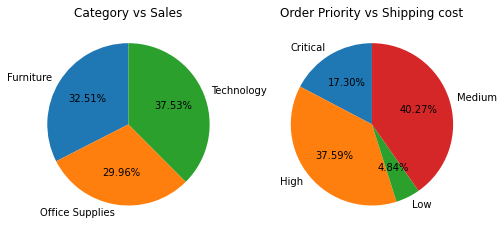

In [49]:
## Plot pie chart showing category wise sales analysis.
## The autopct parameter was used to print the values within the pie chart up to 2 decimal place.
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.pie(cat["Sales"],labels=["Furniture","Office Supplies","Technology"],startangle=90,autopct='%1.2f%%')
plt.title("Category vs Sales")

plt.subplot(1,2,2)
plt.pie(op_quantity.values,labels=op_quantity.index,startangle=90,autopct='%1.2f%%')
plt.title("Order Priority vs Shipping cost")


- Highest sales are from technology followed by furniture then office supplies.


- Shipping cost increases based on order priority of order as above plot we can see that High order priority having max shipping cost while Low priority having least shipping cost.

In [50]:
## Subcategory distribution
sub_cat=df.groupby("Sub-Category")["Sales","Profit"].sum()
sub_cat["Profit Margin%"]=round((sub_cat["Profit"]/sub_cat["Sales"])*100,2)
sub_cat.sort_values(by=["Profit Margin%"],ascending=False)

,Sales,Profit,Profit Margin%
Sub-Category,,,
Paper,2.417875e+05,58111.65350,24.03
Labels,7.335028e+04,14988.92370,20.43
Accessories,7.492370e+05,129626.30620,17.30
Copiers,1.509436e+06,258567.54818,17.13
Envelopes,1.692175e+05,28849.48730,17.05
Binders,4.618694e+05,72433.15160,15.68
Art,3.716132e+05,57829.85930,15.56
Fasteners,8.949505e+04,13844.28890,15.47
Appliances,1.010536e+06,141562.58770,14.01


In [51]:
## Provide index of the dataframe
index1=sub_cat.sort_values(by=["Profit Margin%"],ascending=False).index
index1

Index(['Paper', 'Labels', 'Accessories', 'Copiers', 'Envelopes', 'Binders',
       'Art', 'Fasteners', 'Appliances', 'Phones', 'Furnishings', 'Bookcases',
       'Storage', 'Chairs', 'Supplies', 'Machines', 'Tables'],
      dtype='object', name='Sub-Category')

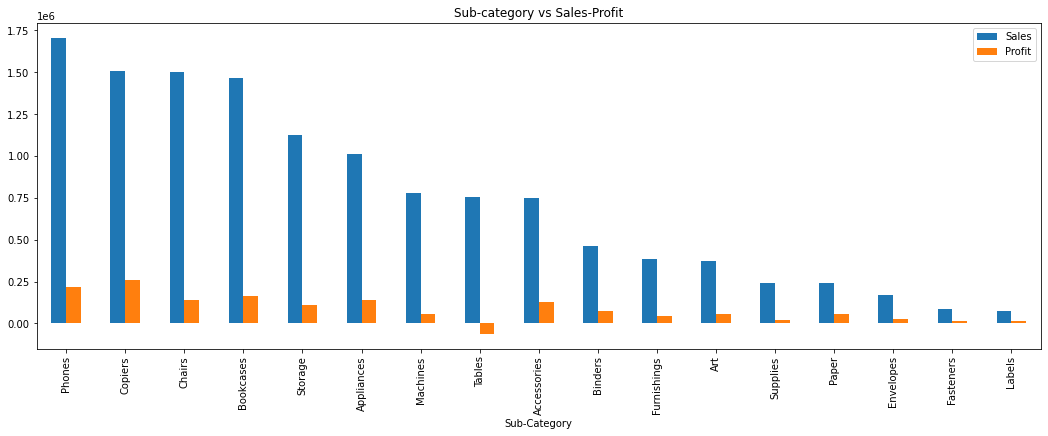

In [52]:
## Plot barchart showing profit margin of each subcategory
sub_cat[["Sales","Profit"]].sort_values(by=['Sales'],ascending=False).plot(kind='bar',figsize=(18,6))
plt.title("Sub-category vs Sales-Profit")
plt.show()

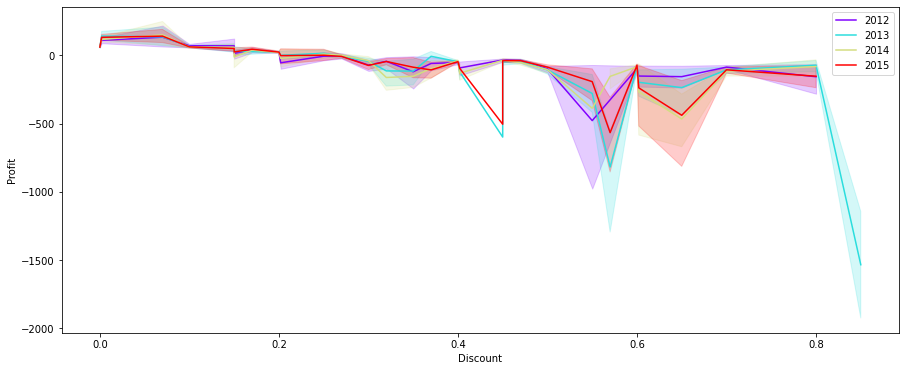

In [53]:
## Variation of profit with discounts for each year.
plt.figure(figsize=(15,6))
sns.lineplot(x="Discount",y="Profit",hue='Year',data=df,palette="rainbow")
plt.legend()
plt.show()

- Intially as discount increases profit increases due to increase in sales but as dicount further increases there is decline in profit because due discounts over profitibility range results in low profit and negative profit margin.


- So it is imp to have optimum discount value which gives high sales with good profit margin.

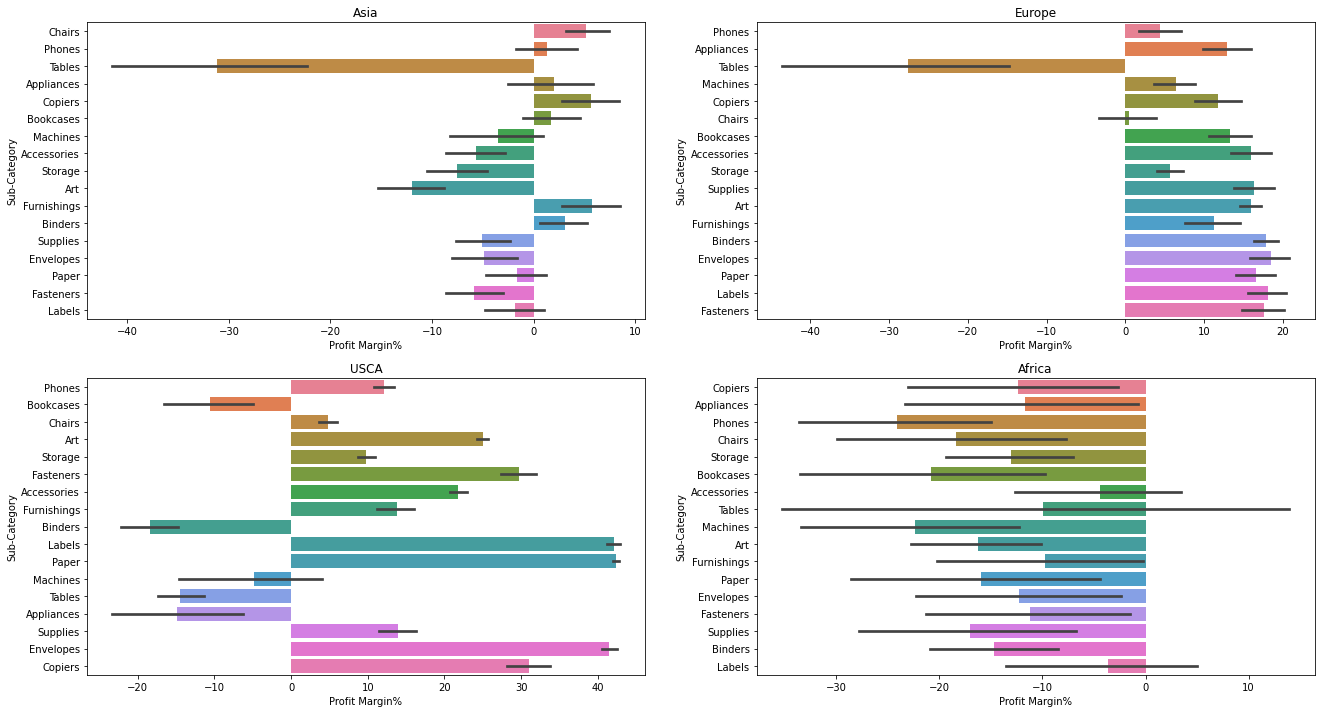

In [54]:
## Region wise subcategory analysis
region=[asia,europe,usca,africa]
r_name=["Asia","Europe","USCA","Africa"]

plt.figure(figsize=(22,12))
j=0
i=1
for feature in region:
    plt.subplot(2,2,i)
    sns.barplot(y="Sub-Category",x="Profit Margin%",data=feature,palette="husl")
    plt.title(r_name[j])
    i=i+1
    j=j+1

- From above we can see that subcategories which having lowest profit margin in each region.


- In Asia most of the subcategories are having negative profit margin with 'tables' at top ,so in asia region its important to improve PM of these subcategory may be by reducing discounts.


- In Europe only tables having negative PM while other subcategoroes performs well.


- In USCA Bookcases,Binders,Tables,Appliances are having negative PM which needs focus to improve PM.


- In Africa all the subcategories are in loss which is not good for business and thats reason for Africa having lowest profit compare to other regions.

In [55]:
## Creating dataframe of consumer segment to analyze each subcategory 
home_office=df[df["Segment"]=="Consumer"]

Text(0.5, 1.0, 'Discount vs Subcategory')

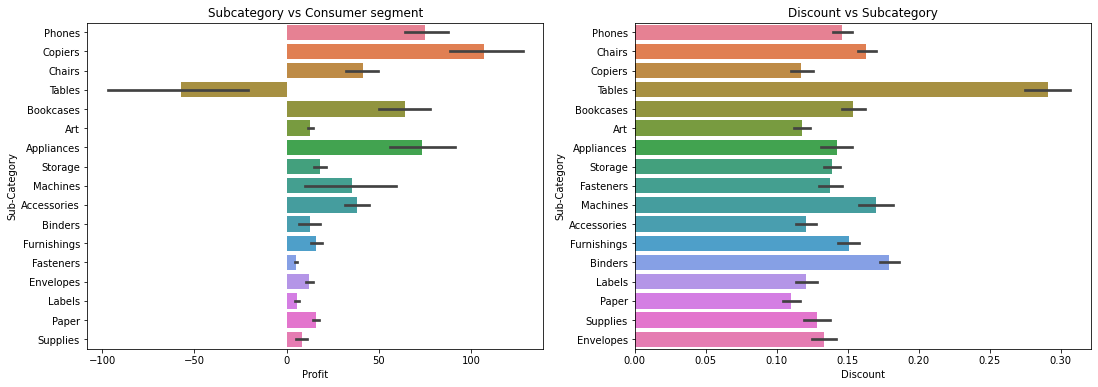

In [56]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.barplot(y="Sub-Category",x="Profit",data=home_office,palette="husl")
plt.title("Subcategory vs Consumer segment")

plt.subplot(1,2,2)
sns.barplot(y="Sub-Category",x="Discount",data=df,palette="husl")
plt.title("Discount vs Subcategory")

- From above plot,it is clear that tables,labels,fastners are subcategory which are having lowest profit in consumer segment.


- Main reason of this is clear in discount vs subcategory plot, tables section giving highest discount over the profitabilty range which result in negative profit margin. 


- Superstore makes highest profit in Copiers,Phones, Bookcases subcategories as dicounts on these are in profitable margin also sales from these subcategories is quite good.


- Tables,Chairs,Binders this are subcategories which giving high discounts hence they are having least profit though sales are good.


## Conclusion:

- The main reason which leads to loss is discounts .Some stores are in loss because they are giving more discounts over profitibity range which results in low profit margins and some stores due to low sales as customers are not ordering from this stores as prices are higher or fewer discount option available on products.


- There is continuous increase in sales from 2012-2015 for each global market except USCA as its sales decrease from 2012 and then again increase upto 2015.Sales growth for Africa market is very stagnent compared to others.


- Some cities have very less sales. Lack of awareness can be the reason for it.So advertising in those cities will lead to increase in sales and profit.


- Homeoffice segment performs well in most region but consumer and corporate segment needs focus as these two having low profit.


- Technology category perfoms well(highest profit) in each segment followed by furniture but office supplies need focus as its having lowest profit in each segment.


- Tables,labels,fastners are subcategory which are having lowest profit in consumer segment.Main reason of this tables section giving highest discount over the profitabilty range which result in negative profit margin.


- Superstore makes highest profit in Copiers,Phones, Bookcases subcategories as discounts on these are in profitable margin also sales from these subcategories is quite good.


- Tables,Chairs,Binders this are subcategories which giving high discounts over profit range hence they are having least profit margin though sales are good.
    